In [7]:
import turicreate as tc
from turicreate import aggregate as agg
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
mw1 = tc.load_sframe('/tmp/nprts/part-0')
mw2 = tc.load_sframe('/tmp/nprts/part-1')

In [50]:
r = mw1.append(mw2)

In [53]:
r.shape, mw2.shape, mw1.shape

((15763220, 2), (7532041, 2), (8231179, 2))

In [55]:
169598 /178056.0

0.9524980904883856

In [72]:
ags = mw.groupby(key_column_names='apk', operations={'fcount': agg.COUNT()})

In [73]:
ags.head()

apk,fcount
21855,2069
27112,7365
19584,1177
18357,521
26561,2
6769,4
22258,116
22239,37
26175,3892
3988,11


In [74]:
mw[mw['apk']==6769]

apk,function,fcount
6769,178583,22
6769,101925,1
6769,378640,2
6769,624680,1


In [75]:
mw[mw['apk']==26561]

apk,function,fcount
26561,178583,1
26561,101925,1


In [76]:
fgs = mw.groupby(key_column_names='function', operations={'acount': agg.COUNT()})

In [84]:
h.head()

,fcount
apk,
19584,1177
26561,2
6769,4
3988,11
16257,108


In [90]:
ss = h.sort_values(by='fcount')

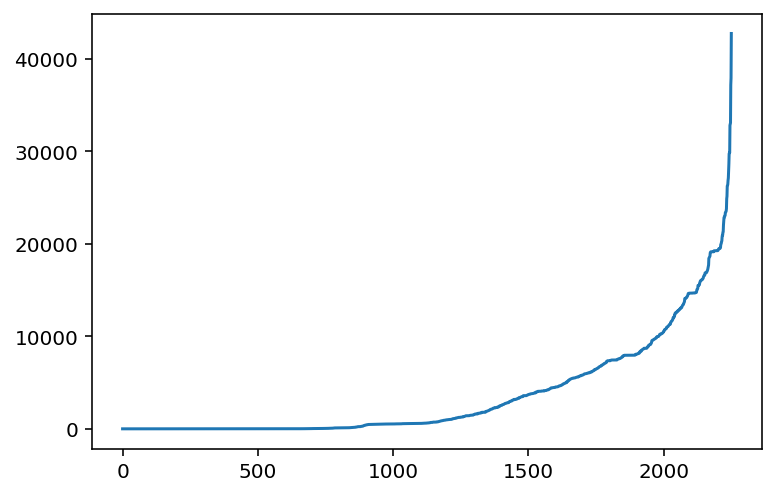

In [95]:
plt.plot(ss['fcount'].values)

## Cluster results

For one parttion the distribtuion of functions and apks

In [8]:
apks = pd.read_csv('../res/clusterres/apks.csv', index_col=0)

In [9]:
apks.shape[0]

178056

In [10]:
tpt = apks.sort_values(by='fcount')['fcount'].values

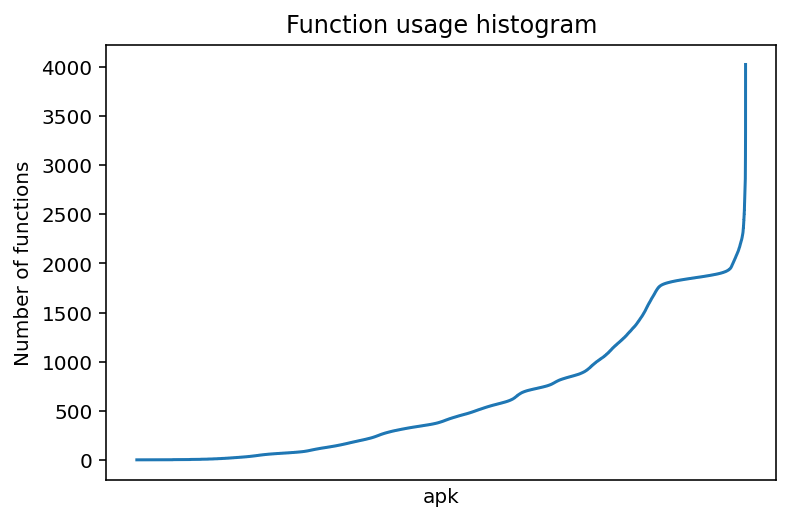

In [11]:
plt.title('Function usage histogram')
plt.ylabel('Number of functions')
plt.xlabel('apk')
plt.xticks([])
plt.plot(tpt);

In [13]:
fck = pd.read_csv('../res/clusterres/funcs.csv', index_col=0)

/Users/jj/miniconda3/envs/grap4/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
fck.shape[0]

11672315

In [15]:
fv = fck.sort_values(by='acount').values

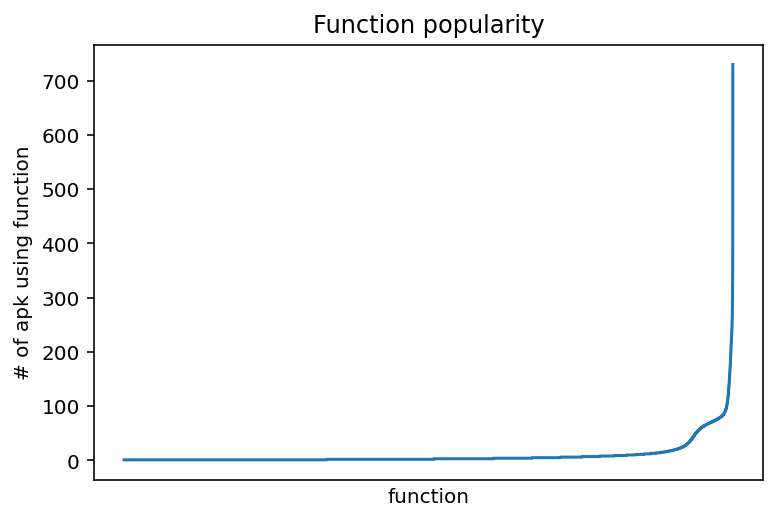

In [16]:
plt.title('Function popularity')
plt.ylabel('# of apk using function')
plt.xlabel('function')
plt.xticks([])
plt.plot(fv);

In [39]:
#2021-05-02 22:25:13,331 root INFO Starting network creation with k=178056
a = """0.2-0-tc-nets.pickle 175245
0.4-0-tc-nets.pickle 175231
0.8-0-tc-nets.pickle 169598
0.84-0-tc-nets.pickle 167282
0.86-0-tc-nets.pickle 166289
0.88-0-tc-nets.pickle 165608
0.9-0-tc-nets.pickle 164271
0.92-0-tc-nets.pickle 162984
0.94-0-tc-nets.pickle 160890
0.96-0-tc-nets.pickle 155892"""

In [40]:
k1=178056
res = dict()
for r in a.split('\n'):
    
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res[g] = siz

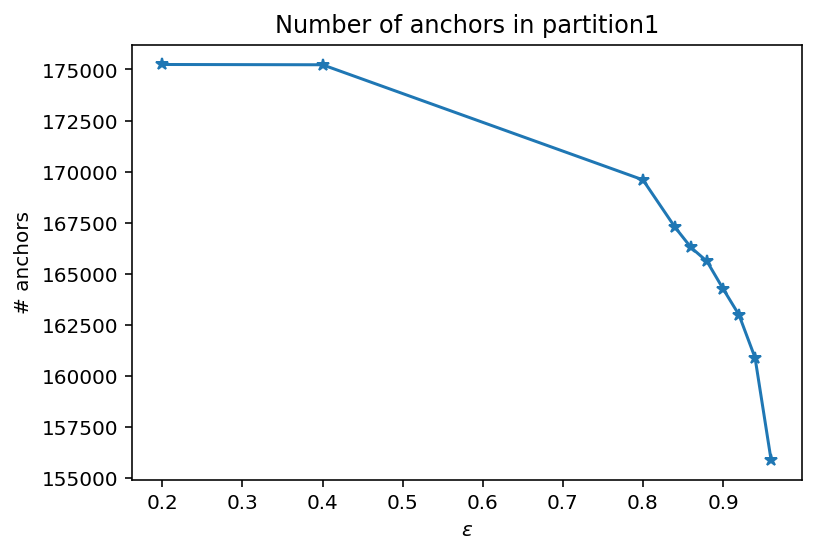

In [19]:
plt.title('Number of anchors in partition1')
plt.xlabel(f"$\epsilon$")
plt.ylabel('# anchors')
plt.plot(res.keys(), res.values(),'-*');

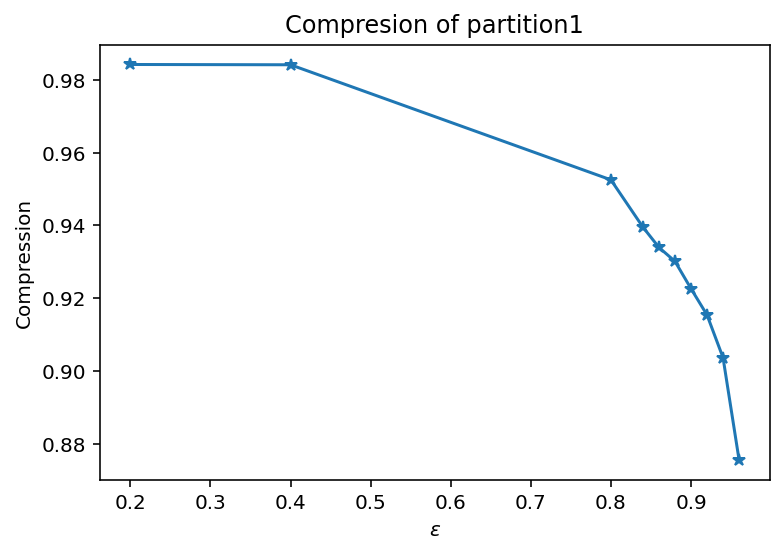

In [20]:
plt.title('Compresion of partition1')
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')
plt.plot(res.keys(), list(map(lambda x: x/k, res.values())),'-*');

In [21]:
## Cluster meged-01 (connected partition 0 and 1m)

In [35]:
k2 = 356112
a2 = """0.8400000000000001-1-tc-nets.pickle 332237
0.8800000000000001-1-tc-nets.pickle 328685
0.86-1-tc-nets.pickle 330316
0.9-1-tc-nets.pickle 325719
0.9199999999999999-1-tc-nets.pickle 322996
0.2-1-tc-nets.pickle 349454
0.4-1-tc-nets.pickle 349355
0.6-1-tc-nets.pickle 345038
0.8-1-tc-nets.pickle 337086"""

In [36]:
res2 = dict()
for r in a2.split('\n'):
    
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res2[g] = siz

In [37]:
res2 = dict(sorted(res2.items()))

In [43]:
k1, k2

(178056, 356112)

In [53]:
k3=712224
a3 = """0.86-0-tc-nets.pickle 657832
0.2-0-tc-nets.pickle 697581
0.9-0-tc-nets.pickle 647733
0.8800000000000001-0-tc-nets.pickle 654294
0.4-0-tc-nets.pickle 697152
0.6-0-tc-nets.pickle 688169
0.8-0-tc-nets.pickle 670772
0.9400000000000001-0-tc-nets.pickle 631408
0.9199999999999999-0-tc-nets.pickle 641650
0.96-0-tc-nets.pickle 601591
0.82-0-tc-nets.pickle 665308
0.8400000000000001-0-tc-nets.pickle 661690"""

In [55]:
res3 = dict()
for r in a3.split('\n'):
    g = float(r.split('-')[0])
    siz=int(r.split(' ')[-1])
    res3[g] = siz
    
res3 = dict(sorted(res3.items()))

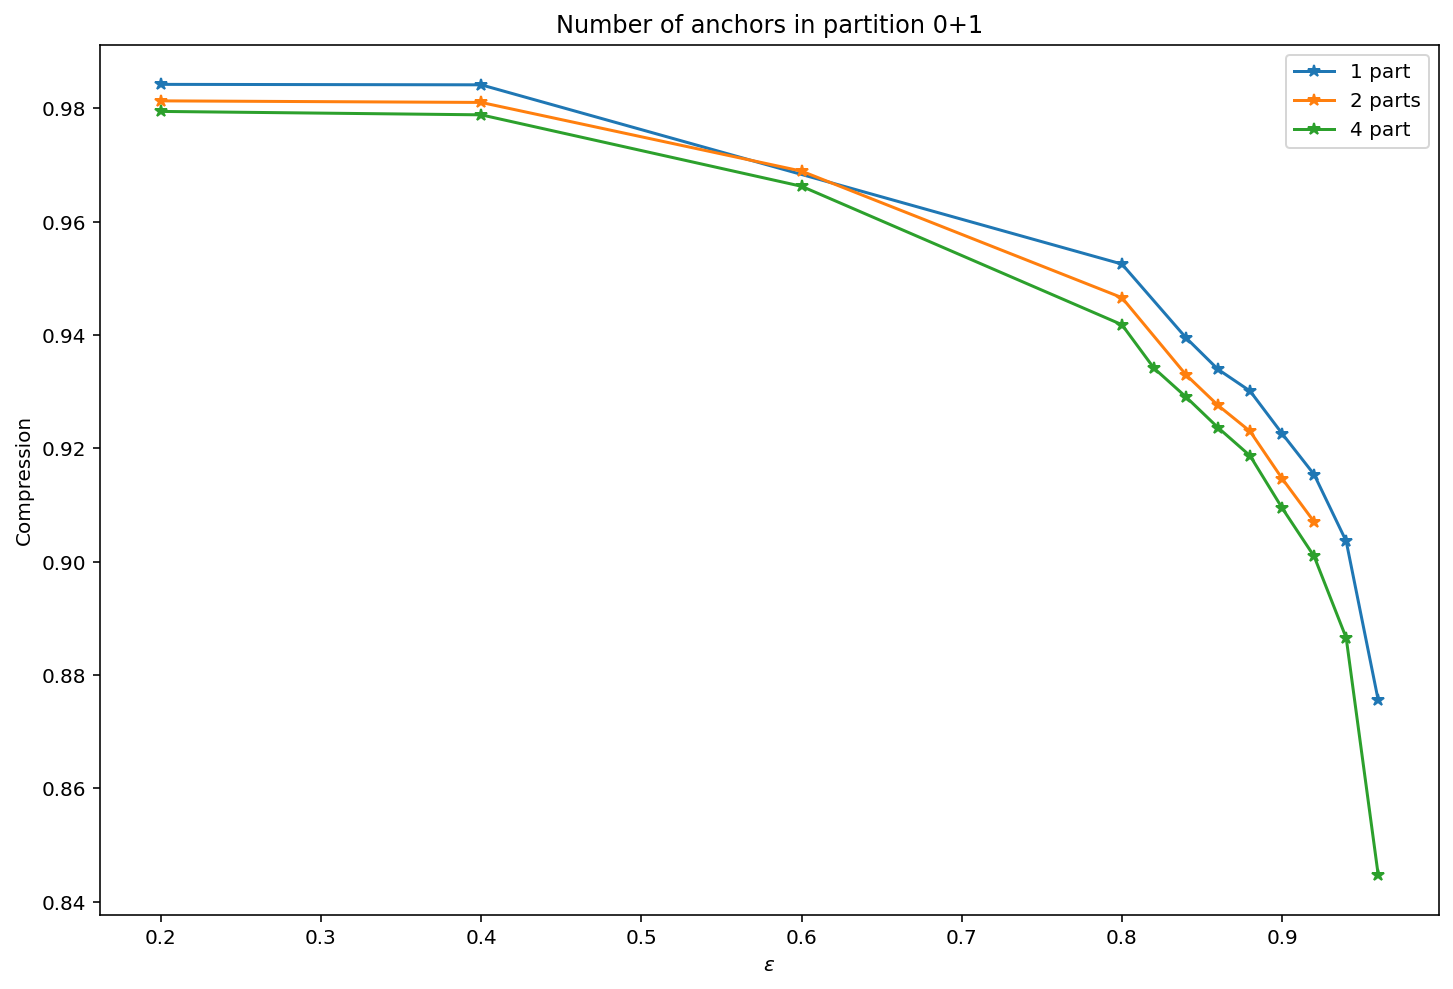

In [62]:
plt.figure(figsize=(12,8))
plt.title('Number of anchors in partition 0+1')
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label='1 part');
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label='2 parts');
plt.plot(res3.keys(), list(map(lambda x: x/k3, res3.values())),'-*', label='4 part');

plt.legend();
